In [1]:
import os
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
from ResoFit._pulse_shape import NeutronPulse
from ResoFit._pulse_shape import ProtonPulse
from ResoFit.experiment import Experiment
import numpy as np
from ResoFit.simulation import Simulation
import scipy.signal as ss
import matplotlib.pyplot as plt
import scipy

In [2]:
%matplotlib notebook
overwrite_csv = False
folder = 'data/IPTS_19558/reso_data_19558'
data_file1 = 'Gd_thick.csv'
spectra_file = 'Image002_Spectra.txt'
experiment1 = Experiment(data_file=data_file1,
                         spectra_file=spectra_file,
                         folder=folder,
                         baseline=True)
# experiment1.slice(slice_start=300, reset_index=False)
# peak_df = experiment1.find_peak()
source_to_detector_m = 16.45
simulation = Simulation(energy_min=78, energy_max=82, energy_step=0.01, database='ENDF_VII')
simulation.add_layer(layer='Gd', layer_thickness_mm=0.15)

Fitted params for raw proton pulse shape:
Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude  1.984e+04     -inf      inf    36.58     True     None     None
center         1909     -inf      inf   0.3126     True     None     None
fwhm          345.7     -inf      inf   0.7362    False 2.3548200*sigma     None
height         53.9     -inf      inf  0.09941    False 0.3989423*amplitude/max(1.e-15, sigma)     None
sigma         146.8        0      inf   0.3126     True     None     None


/Users/y9z/anaconda3/envs/py36/lib/python3.6/site-packages/lmfit/models.py:30: FutureWarning:

'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.



In [ ]:
simulation._convolve_beam_shapes(source_to_detector_m=source_to_detector_m, conv_proton=False)
x_n = simulation.x_tof_us
y_n = 1-simulation.y_att

✅ '/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Neutron_fitted_params_1eV_500eV_ikeda_carpenter.csv' exists...
Fitted parameters file loaded.
✅ '/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Loglog_linear_within_1eV_500eV_ikeda_carpenter.csv' exists...
Parameters linear fitted file loaded.
✅ '/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/TOF_shape_eV_78.0_82.0_0.01_us_0.05_183.7_0.01_for_sum_16.45m_ikeda_carpenter.csv' exists...


In [6]:
simulation._convolve_beam_shapes(source_to_detector_m=source_to_detector_m, conv_proton=True)
x_np = simulation.x_tof_us
y_np = 1-simulation.y_att

✅ '/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Neutron_fitted_params_1eV_500eV_ikeda_carpenter.csv' exists...
Fitted parameters file loaded.
✅ '/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Loglog_linear_within_1eV_500eV_ikeda_carpenter.csv' exists...
Parameters linear fitted file loaded.
✅ '/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/TOF_shape_eV_78.0_82.0_0.01_us_0.05_183.7_0.01_proton_for_sum_16.45m_ikeda_carpenter.csv' exists...
TOF neutron beam shape file loaded.


/Users/y9z/anaconda3/envs/py36/lib/python3.6/site-packages/lmfit/models.py:30: FutureWarning:

'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.



<IPython.core.display.Javascript object>


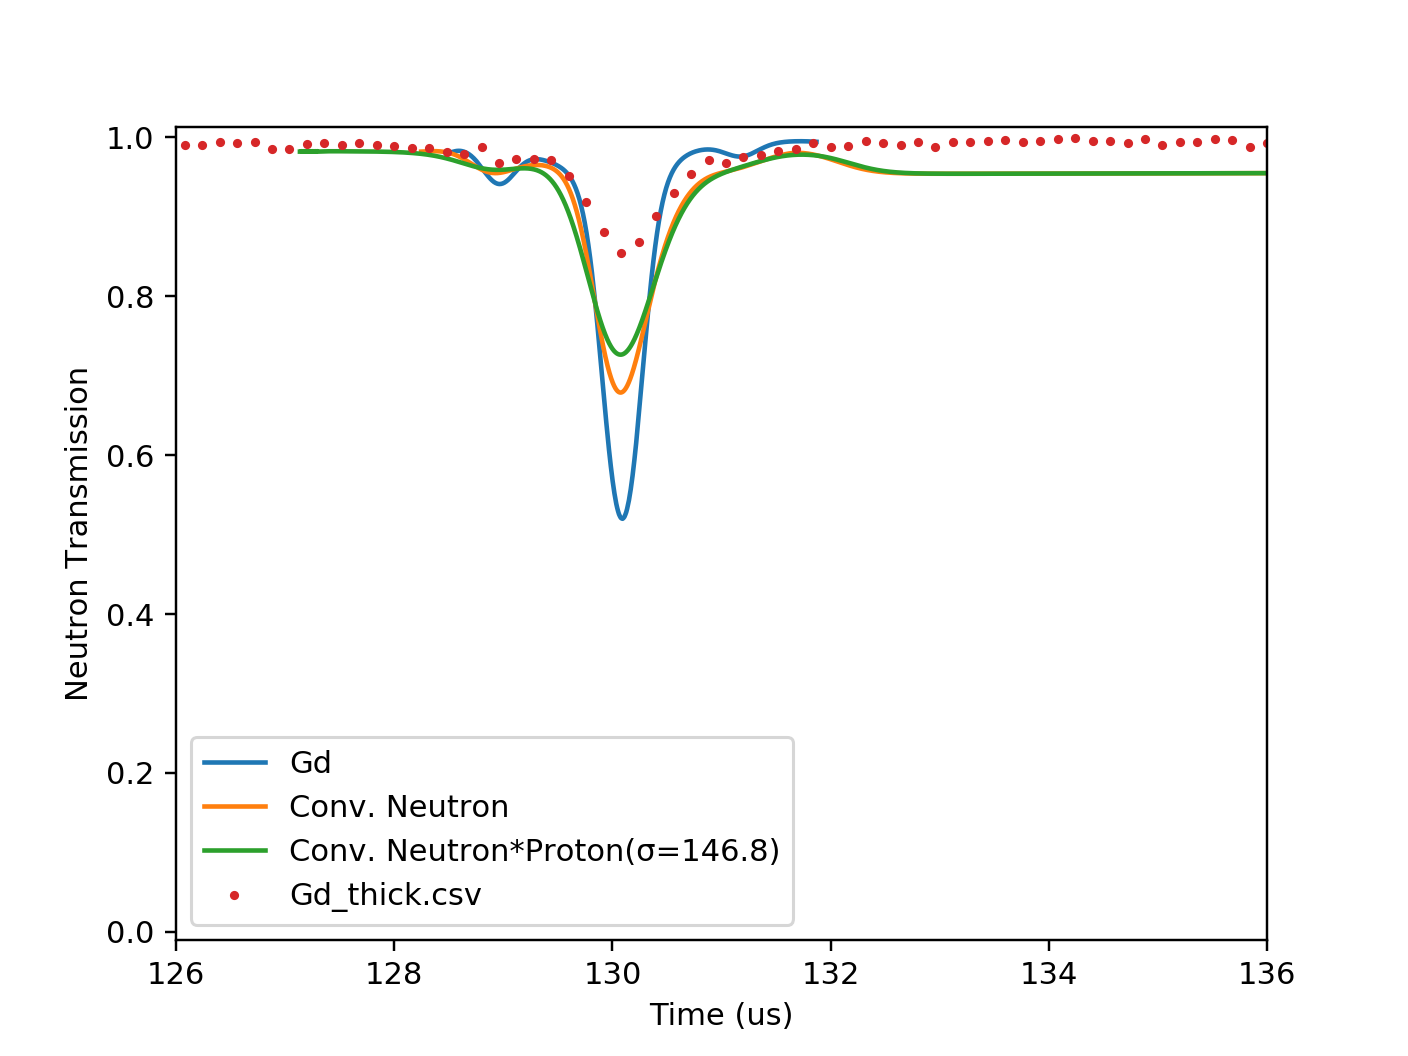

'Time (us)' was obtained with the following:
source_to_detector_m=16.45
offset_us=2.78


In [8]:
d = 5.2
fig = simulation.plot_simu(x_type='time', y_type='transmission', source_to_detector_m=source_to_detector_m, offset_us=2.78,
                          mixed=False, all_layers=True)
fig.axes[0].plot(x_n+1.95-d, y_n, label='Conv. Neutron')
fig.axes[0].plot(x_np+0.03-d, y_np, label='Conv. Neutron*Proton(\u03C3=146.8)')
ax = experiment1.plot_raw(x_type='time', y_type='transmission', time_unit='us', ax_mpl=fig.axes[0])
# ax.plot(x_np300-d, y_np300, label='Conv. Neutron*Proton(\u03C3=300)')
# ax.plot(x_np500-d, y_np500, label='Conv. Neutron*Proton(\u03C3=500)')
# experiment1.plot_raw(x_type='time', y_type='transmission', time_unit='us', ax_mpl=fig.axes[0])
# plt.plot(simulation.x_tof_us-5.2, 1-simulation.y_att, label='Conv. N*P(\u03C3=146.8)')
ax.set_xlim(left=126, right=136)
ax.legend()

In [9]:
simulation.neutron_pulse.shape_tof_df_interp

,tof_us,78.0,78.01,78.02,78.03,78.04,78.05,78.06,78.07,78.08,...,81.91,81.92,81.93,81.94,81.95,81.96,81.97,81.98,81.99,82.0
0,131.374221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,131.382229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,131.390239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,131.398250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,131.406263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,131.414277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,131.422293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,131.427521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,131.430310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,131.434351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
